### SETUP CSV

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportions_ztest

df = pd.read_csv("banana.csv")
df = df.drop(columns=[df.columns[0]])
df

,Acidity,Weight,Length,Appearance,Tannin,Ripeness,Sweetness,Country_of_Origin,Firmness,Grade,Price
0,5.977114,149.825704,49.249144,3.770162,8.092385,6.916558,6.763285,Costa Rica,0.370053,A,20075.252141
1,8.625523,150.759254,50.048300,6.007516,7.400025,6.706338,6.481902,Costa Rica,0.560635,A,20016.601326
2,8.813012,148.780694,49.865871,5.166949,6.861433,6.607327,5.702631,Costa Rica,0.373475,C,20123.529719
3,7.496444,152.329626,49.676489,5.451806,7.342269,6.482970,6.265227,Colombia,0.490814,A,20055.353632
4,6.885109,150.412228,50.526268,3.872441,7.630643,6.064423,6.856929,Colombia,0.826858,A,20003.643981
...,...,...,...,...,...,...,...,...,...,...,...
1995,6.642403,151.039757,50.238865,4.867772,9.091904,7.985697,6.804132,Costa Rica,0.500176,A,19921.061841
1996,7.653993,151.431401,49.132623,5.734657,8.231696,6.854072,6.806902,Colombia,0.706189,B,19875.326652
1997,8.591312,150.018217,47.992948,3.827522,8.015240,6.696851,6.129531,Costa Rica,0.864229,B,19998.199999
1998,7.854793,149.431460,50.440215,3.479959,8.493746,6.286329,6.463142,Ecuador,0.658963,B,20029.421471


### SOAL NO 1

In [279]:
# Deskripsi statistik numerik
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = pd.concat([deskripsi_numerik, modus.to_frame().T, skewness.to_frame().T, 
                               kurtosis.to_frame().T, variansi.to_frame().T, range_value.to_frame().T, 
                               IQR.to_frame().T])
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 
                           'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'Country_of_Origin' dan 'Grade'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
            Acidity       Weight       Length   Appearance       Tannin  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      8.014830   150.011549    49.950434     4.965595     7.965435   
std       1.105781     1.194980     0.894599     1.014863     1.217188   
min       4.456118   146.060922    46.418052     1.775864     4.291274   
25%       7.259942   149.227116    49.346508     4.258210     7.167241   
50%       8.005347   150.022865    49.923682     4.979534     8.022448   
75%       8.758361   150.827613    50.572027     5.653875     8.792184   
max      11.418636   154.070370    53.065151     8.233968    12.416177   
mode      4.456118   146.060922    46.418052     1.775864     4.291274   
skew      0.056793    -0.084767     0.026878    -0.035389    -0.066152   
kurt     -0.147134     0.024967    -0.053550    -0.002189     0.066349   
var       1.222752     1.427977     0.800307     1.029946     1.481546   
range   

### SOAL NO 2

In [280]:
print("Pada file banana.csv, terdapat data yang rusak atau kotor pada kolom 'Country_of_Origin' dan kolom 'Price'.") 
print("Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.")
print("Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1 dan 0.")
print("Sehingga data tersebut perlu dibuang terlebih dahulu")
print()
print("Pada file banana.csv, terdapat data outlier pada beberapa kolom")
print("Data outlier adalah data observasi yang berbeda jauh dari observasi lain dalam dataset")
print("Biasanya data outlier dapat ditentukan melalui beberapa metode dan kemudian menghapus atau") 
print("mengganti data outlier tersebut")
print("Beberapa metode yang dapat digunakan adalah metode IQR, Standar Deviasi, Z-Score")
print("Metode yang dipilih adalah metode IQR karena IQR tidak dipengaruhi oleh outlier dan cocok untuk") 
print("data yang tidak terdistribusi normal")
print("Metode ini menentukan data outlier dengan mencari data observasi yang berada di")
print("bawah batas lower bound dan di atas upper bound")
print("Lower bound = Q1 - 1.5 * IQR dan Upper bound = Q3 + 1.5 * IQR")
print("Setelah menemukan semua data outlier pada kolom, kami memutuskan untuk menghapus data tersebut")

Pada file banana.csv, terdapat data yang rusak atau kotor pada kolom 'Country_of_Origin' dan kolom 'Price'.
Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.
Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1 dan 0.
Sehingga data tersebut perlu dibuang terlebih dahulu

Pada file banana.csv, terdapat data outlier pada beberapa kolom
Data outlier adalah data observasi yang berbeda jauh dari observasi lain dalam dataset
Biasanya data outlier dapat ditentukan melalui beberapa metode dan kemudian menghapus atau
mengganti data outlier tersebut
Beberapa metode yang dapat digunakan adalah metode IQR, Standar Deviasi, Z-Score
Metode yang dipilih adalah metode IQR karena IQR tidak dipengaruhi oleh outlier dan cocok untuk
data yang tidak terdistribusi normal
Metode ini menentukan data outlier dengan mencari data observasi yang berada di
bawah batas lower bound dan di atas upper bound
Lower bound = Q1 - 1.5 * IQR dan Upper bound = Q3 + 1.5 * IQR

In [281]:
# Menghapus baris untuk data yang kotor
df = df[df['Country_of_Origin'] != 'undefined']
df = df[df['Price'] != -1]
df = df[df['Price'] != 0]

In [282]:
# Menghapus outlier dengan metode IQR
def remove_outliers(df):
    while True:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        outliers_dict = {}
        outlier_indices = []

        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            filter = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
            if df[filter].shape[0] > 0:
                outliers_dict[col] = df[filter]

        for col, data in outliers_dict.items():
            outlier_indices.extend(data.index.tolist())

        outlier_indices = list(set(outlier_indices))

        if len(outlier_indices) == 0:
            break

        df.drop(index=outlier_indices, inplace=True)
    
    return df

df = remove_outliers(df)
print(df)

       Acidity      Weight     Length  Appearance    Tannin  Ripeness  \
0     5.977114  149.825704  49.249144    3.770162  8.092385  6.916558   
1     8.625523  150.759254  50.048300    6.007516  7.400025  6.706338   
2     8.813012  148.780694  49.865871    5.166949  6.861433  6.607327   
3     7.496444  152.329626  49.676489    5.451806  7.342269  6.482970   
4     6.885109  150.412228  50.526268    3.872441  7.630643  6.064423   
...        ...         ...        ...         ...       ...       ...   
1995  6.642403  151.039757  50.238865    4.867772  9.091904  7.985697   
1996  7.653993  151.431401  49.132623    5.734657  8.231696  6.854072   
1997  8.591312  150.018217  47.992948    3.827522  8.015240  6.696851   
1998  7.854793  149.431460  50.440215    3.479959  8.493746  6.286329   
1999  6.830450  149.131293  50.093055    4.290965  9.139122  6.464764   

      Sweetness Country_of_Origin  Firmness Grade         Price  
0      6.763285        Costa Rica  0.370053     A  20075.

### SOAL NO 3

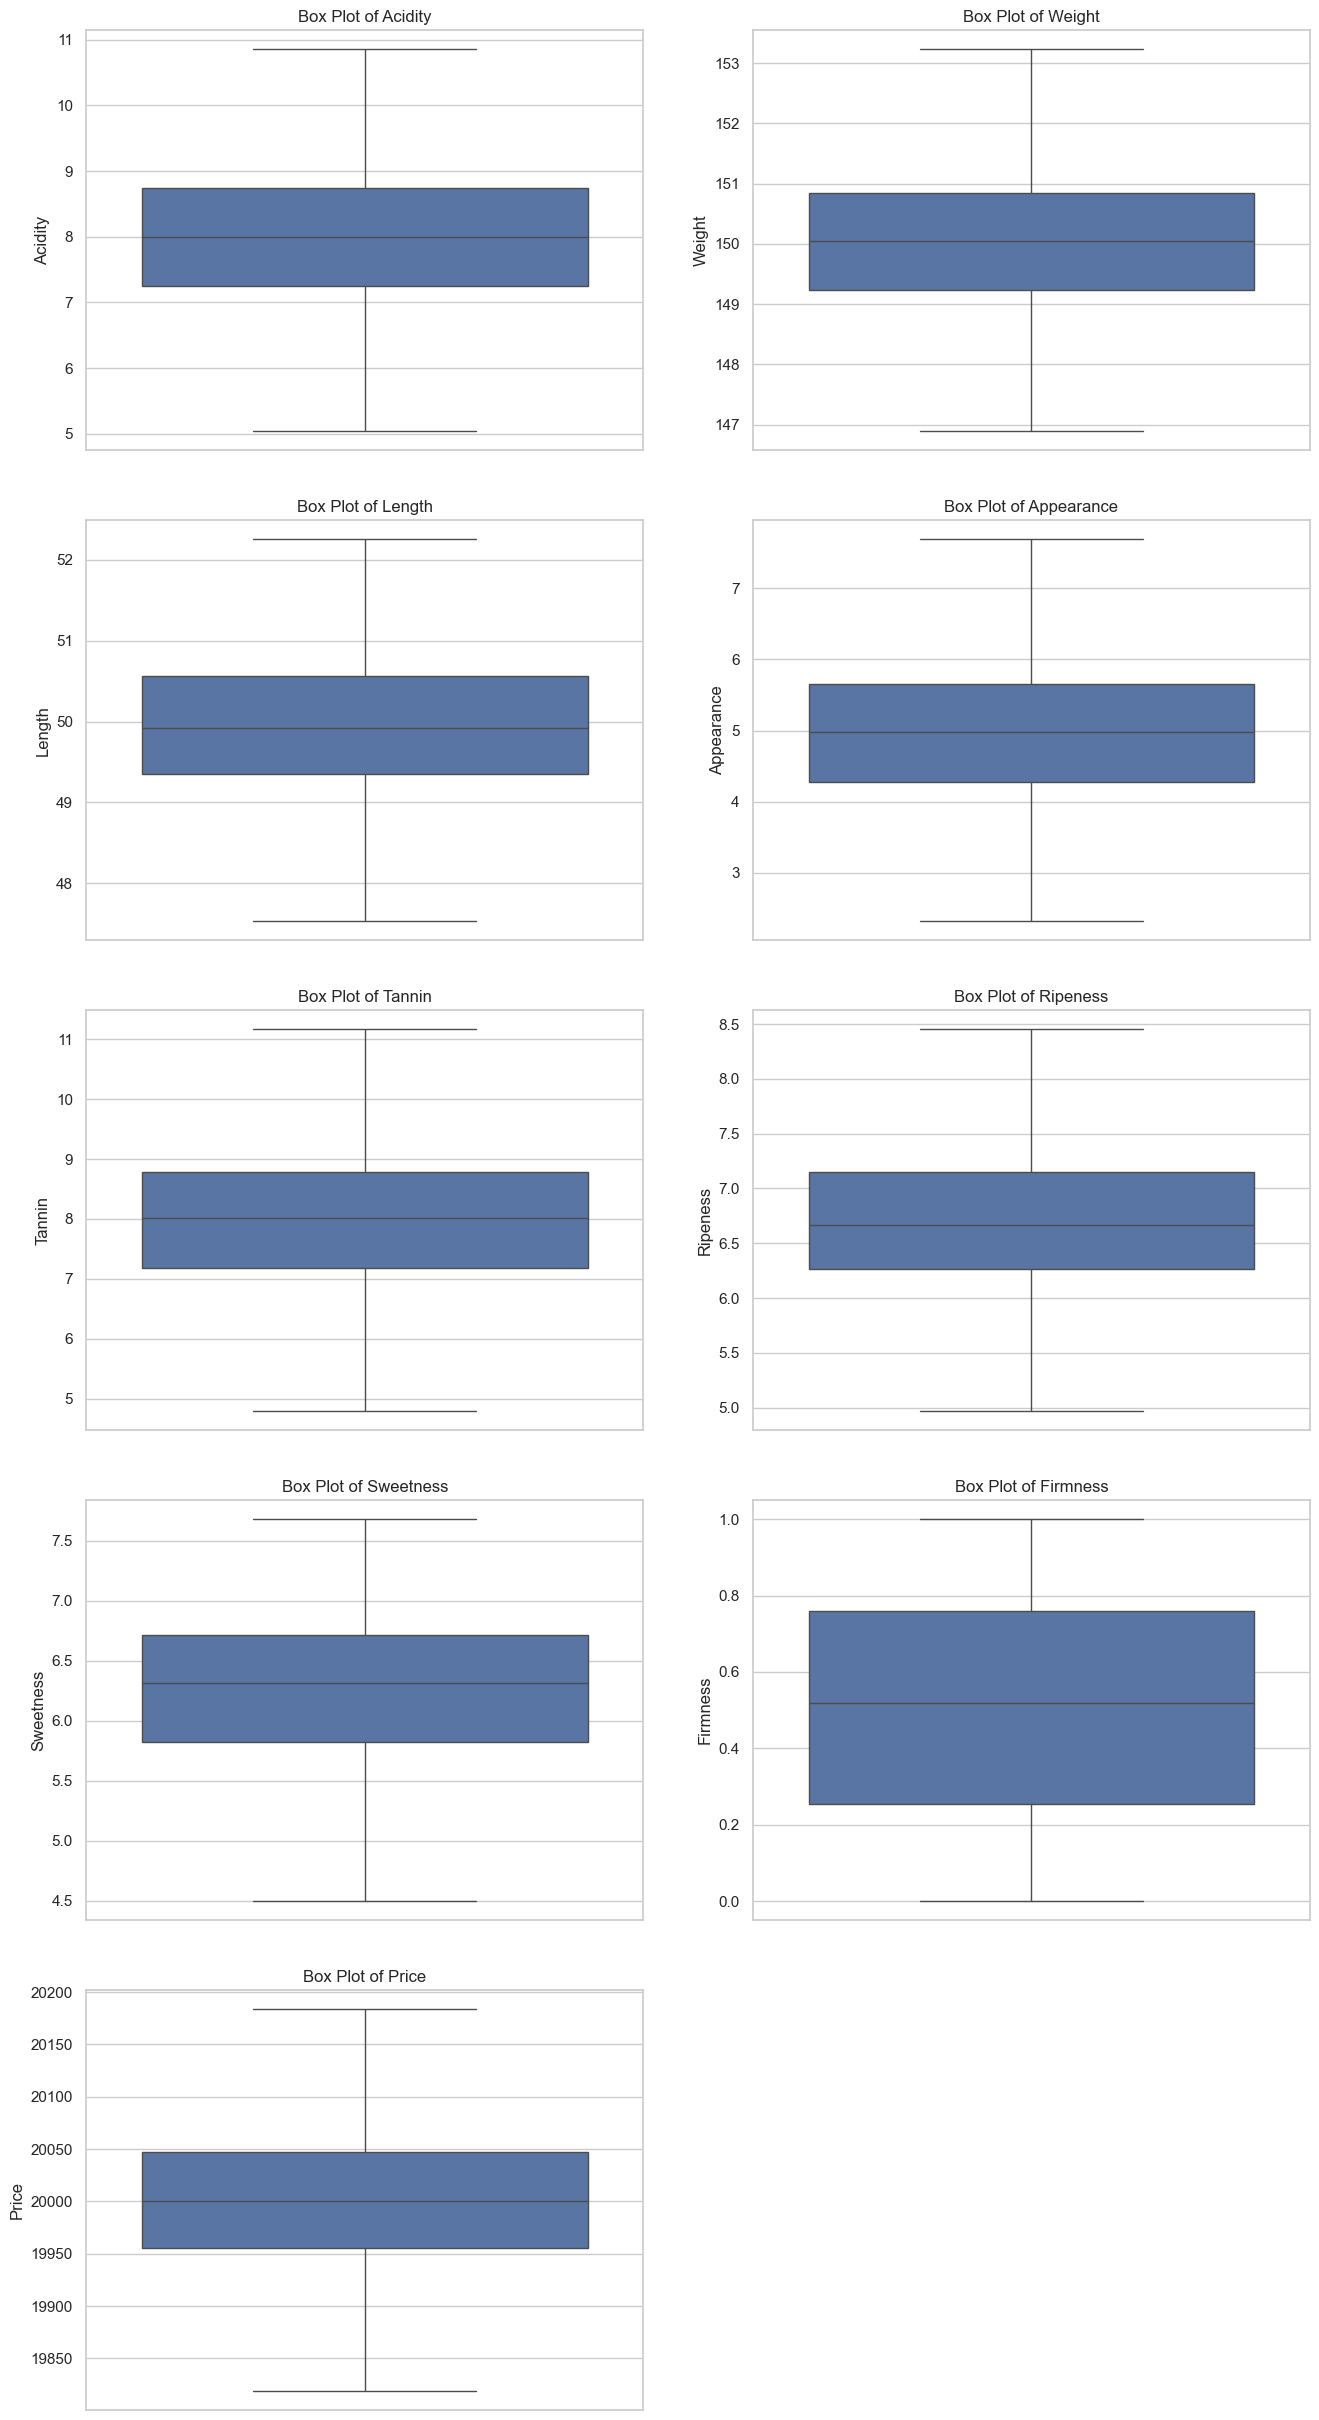

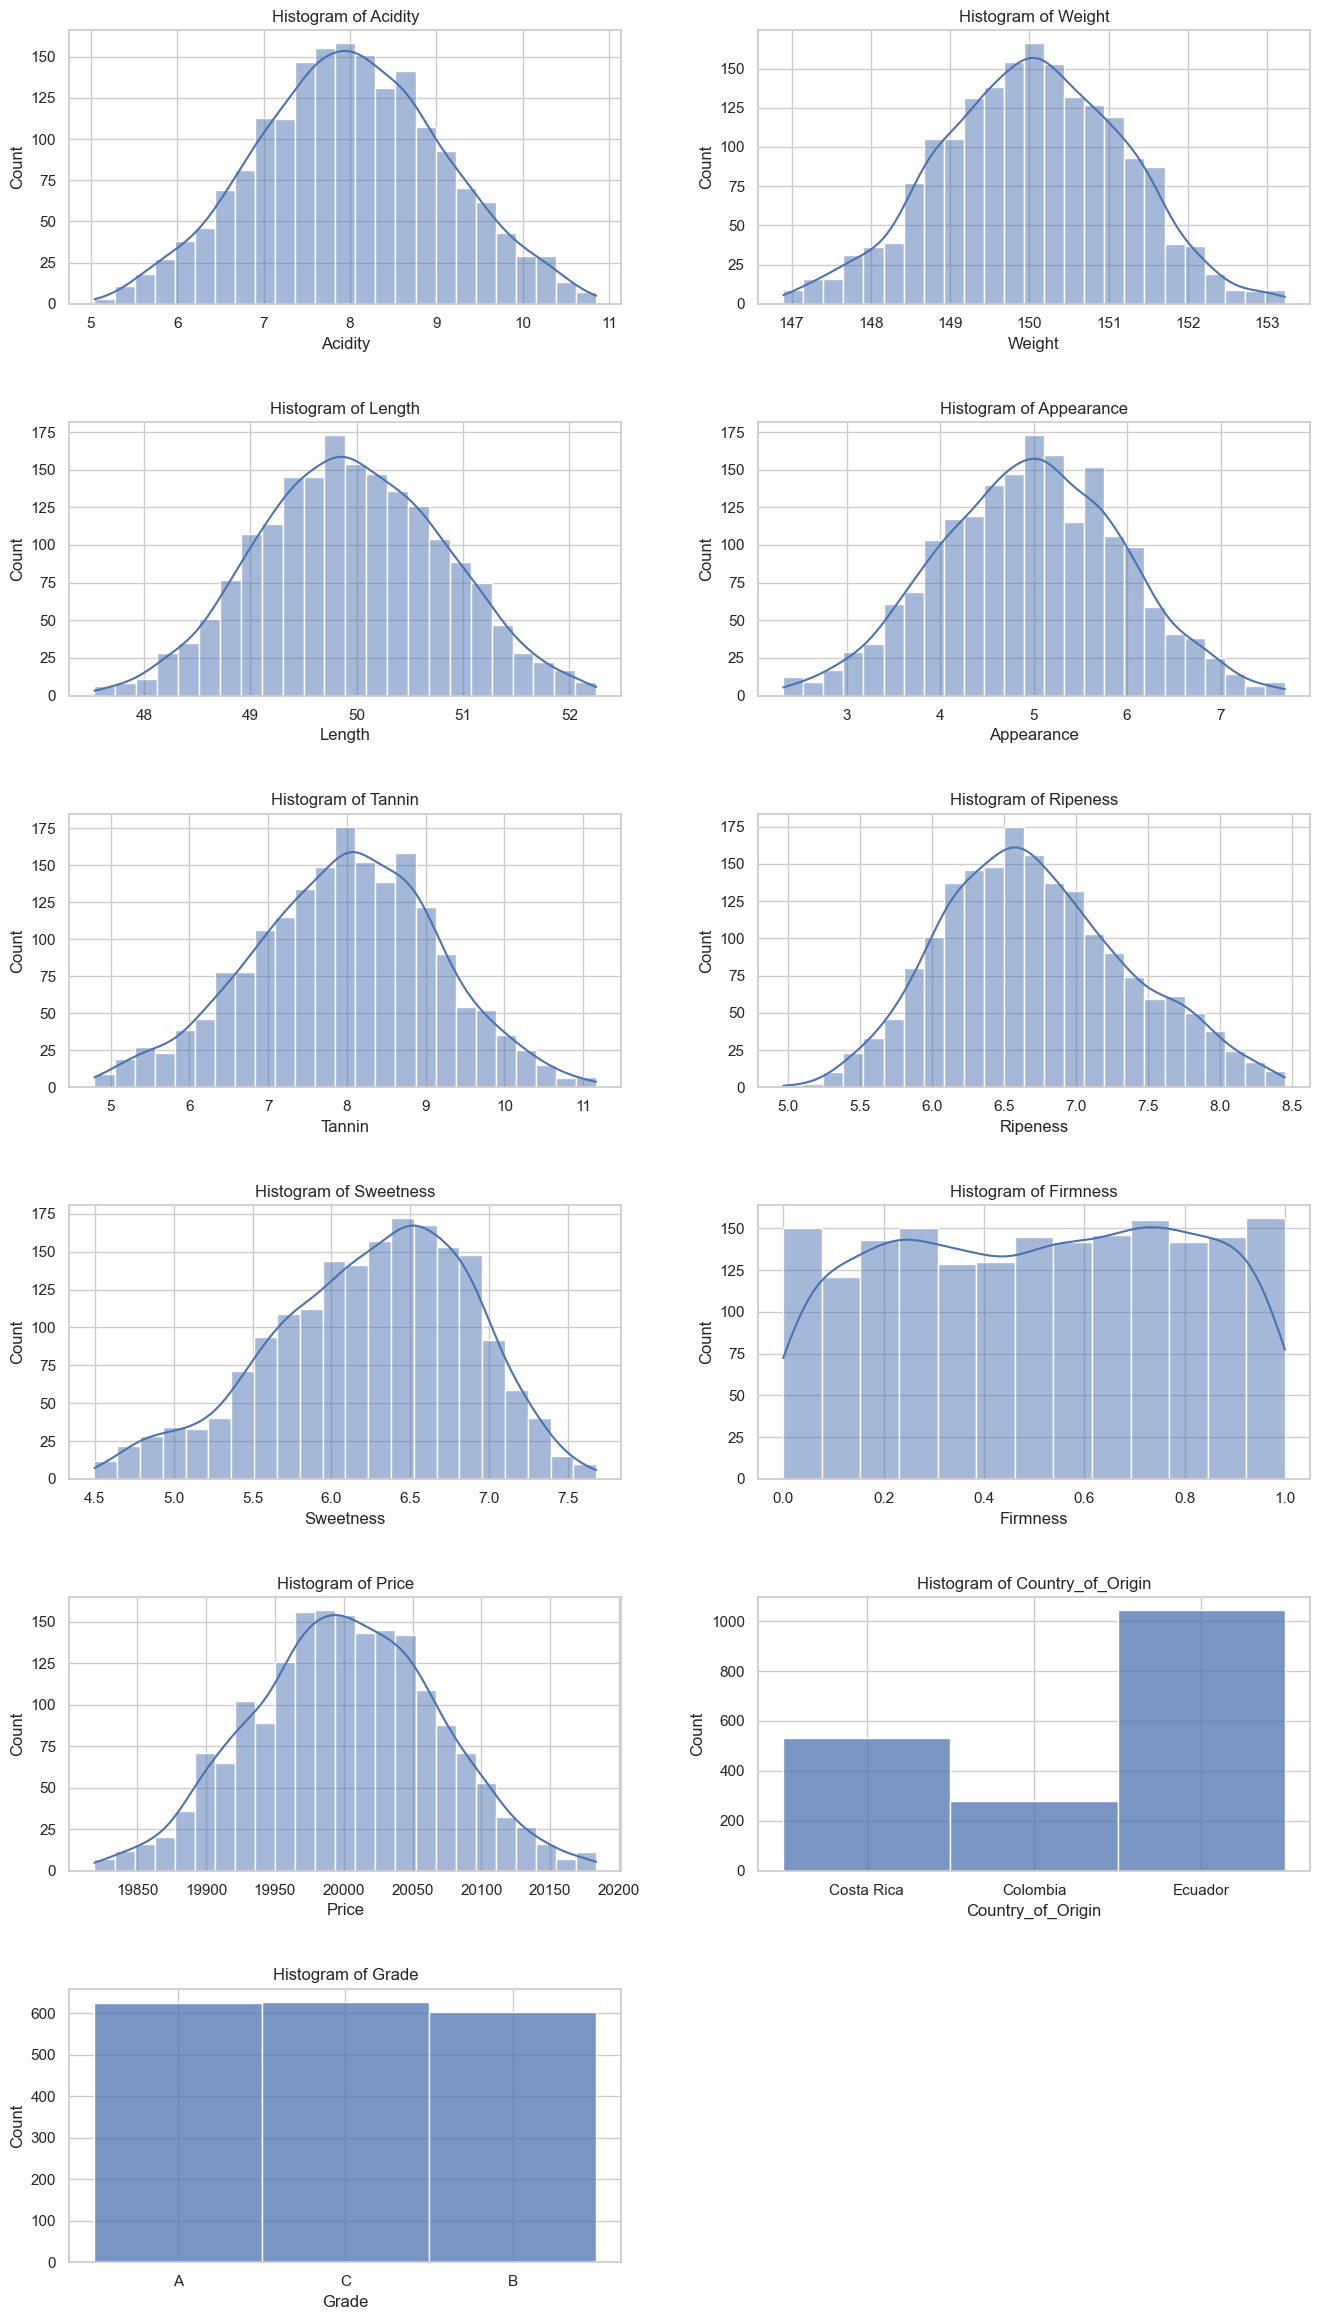

In [283]:
sns.set_theme(style="whitegrid")

numeric_columns = ['Acidity', 'Weight', 'Length', 'Appearance', 'Tannin', 'Ripeness', 'Sweetness', 'Firmness', 'Price']

categorical_columns = ['Country_of_Origin', 'Grade']

fig, axes = plt.subplots(5, 2, figsize=(14, 25))

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box Plot of {col}')

for i in range(len(numeric_columns), 10):
    axes[i//2, i%2].axis('off')

fig.tight_layout(pad=3.0)
plt.show()

fig, axes = plt.subplots(6, 2, figsize=(14, 24))
for i, col in enumerate(numeric_columns + categorical_columns):
    if col in numeric_columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'Histogram of {col}')
    else:
        sns.histplot(data=df, x=col, ax=axes[i//2, i%2], discrete=True)
        axes[i//2, i%2].set_title(f'Histogram of {col}')

if len(numeric_columns + categorical_columns) % 2 != 0:
    axes[-1, -1].axis('off')

fig.tight_layout(pad=3.0)
plt.show()

### SOAL 4

In [284]:
# Analisis Berdasarkan Statistik dan Visualisasi
# Skewness mempengaruhi posisi puncak, kalau + bergeser ke kiri, kalau - bergeser ke kanan
# Kurtosis mempengaruhi puncak kurva, kalau + semakin lancip atau tinggi, kalau - semakin landai atau datar
print("Menentukan distribusi setiap kolom numerik\n")

# Acidity
# Skewness: 0.012891 (sangat dekat dengan 0, menunjukkan distribusi yang hampir simetris)
# Kurtosis: -0.326980 (sedikit lebih datar daripada distribusi normal)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Acidity: Terdistribusi hampir normal")

# Weight
# Skewness: -0.053375 (hampir simetris)
# Kurtosis: -0.258359 (sedikit lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Weight: Terdistribusi hampir normal")


# Length
# Skewness: 0.036229 (hampir simetris)
# Kurtosis: -0.335011 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Length: Terdistribusi hampir normal")

# Appearance
# Skewness: -0.021565 (hampir simetris)
# Kurtosis: -0.236897 (sedikit lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Appearance: Terdistribusi hampir normal")

# Tannin
# Skewness: -0.131216 (sedikit skewness negatif)
# Kurtosis: -0.178181 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Tannin: Terdistribusi hampir normal")

# Ripeness
# Skewness: 0.308069 (sedikit skewness positif)
# Kurtosis: -0.315081 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak sedikit ke kiri dari tengah
# Kesimpulan: Terdistribusi hampir normal
print("Ripeness: Terdistribusi hampir normal")

# Sweetness
# Skewness: -0.429043 (sedikit skewness negatif)
# Kurtosis: -0.262934 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak sedikit ke kanan dari tengah
# Kesimpulan: Terdistribusi hampir normal
print("Sweetness: Terdistribusi hampir normal")

# Firmness
# Skewness: -0.043285 (hampir simetris)
# Kurtosis: -1.204085 (lebih datar dan berkemungkinan distribusi uniform)
# Visual: Tidak membentuk puncak, hampir lurus secara horizontal
# Kesimpulan: Distribusi lebih dekat ke uniform daripada normal.
print("Firmness: Terdistribusi uniform")

# Price
# Skewness: 0.014543 (sangat dekat dengan 0)
# Kurtosis: -0.256620 (lebih datar)
# Visual: Mengikuti kurva simetris dengna puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Price: Terdistribusi hampir normal")

Menentukan distribusi setiap kolom numerik

Acidity: Terdistribusi hampir normal
Weight: Terdistribusi hampir normal
Length: Terdistribusi hampir normal
Appearance: Terdistribusi hampir normal
Tannin: Terdistribusi hampir normal
Ripeness: Terdistribusi hampir normal
Sweetness: Terdistribusi hampir normal
Firmness: Terdistribusi uniform
Price: Terdistribusi hampir normal


### SOAL 5

In [285]:
# LANGKAH-LANGKAH:
# 1. Tentukan H0: θ = data
# 2. Tentukan H1: θ > data (greater) atau θ < data (less) atau θ != data (two-sided)
# 3. Tentukan α: α = 0.05
# 4. Tentukan uji stastik dan daerah kritis: uji statistik dan daerah kritis tergantung soal
# 5. Hitung nilai uji dan p_value
# 6. Ambil keputusan tolak atau tidak tolak


# Fungsi untuk Uji z satu sampel dan perhitungan nilai p
def z_test(sample, data, alpha, alternative):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=0)
    n = len(sample)
    z_stat = (sample_mean - data) / (sample_std / np.sqrt(n))

    if alternative == 'greater':
        p_value = 1 - norm.cdf(z_stat)
        critical_value = norm.ppf(1 - alpha)
        reject_null = z_stat > critical_value
    elif alternative == 'less':
        p_value = norm.cdf(z_stat)
        critical_value = norm.ppf(alpha)
        reject_null = z_stat < critical_value
    else:
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))
        critical_value = norm.ppf(1 - alpha / 2)
        reject_null = abs(z_stat) > critical_value

    return z_stat, p_value, critical_value, reject_null

# Fungsi untuk Uji t satu sampel dan perhitungan nilai p
def t_test(sample, data, alpha, alternative):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1) 
    n = len(sample)
    t_stat = (sample_mean - data) / (sample_std / np.sqrt(n))
    df = n - 1

    if alternative == 'greater':
        p_value = 1 - t.cdf(t_stat, df)
        critical_value = t.ppf(1 - alpha, df)
        reject_null = p_value < alpha
    elif alternative == 'less':
        p_value = t.cdf(t_stat, df)
        critical_value = t.ppf(alpha, df)
        reject_null = p_value < alpha
    else:
        p_value = 2 * (1 - t.cdf(abs(t_stat), df))
        critical_value = t.ppf(1 - alpha / 2, df)
        reject_null = abs(p_value) < alpha

    return t_stat, p_value, critical_value, reject_null

# Fungsi proporsi binomial dengan pendekatan z
def z_proportion_test(sample, P0, P1, alpha, alternative):
    n = len(sample)
    z_stat = (P1 - P0) / np.sqrt((P0 * (1 - P0)) / n)

    if alternative == 'greater':
        p_value = 1 - norm.cdf(z_stat)
        z_critical = norm.ppf(1 - alpha)
        reject_null = p_value < alpha
    elif alternative == 'less':
        p_value = norm.cdf(z_stat)
        z_critical = norm.ppf(alpha)
        reject_null = p_value < alpha
    else: 
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))
        z_critical = norm.ppf(1 - alpha / 2)
        reject_null = p_value < alpha

    return z_stat, p_value, z_critical, reject_null

# binomial komputasi jelek
# def binomial_prob(k, n, p):
#     comb = math.comb(n, k)  # Menggunakan math.comb untuk menghitung kombinasi
#     return comb * (p ** k) * ((1 - p) ** (n - k))

# def manual_binomial_test(successes, trials, prop_null, alpha=0.05, alternative='two-sided'):
#     p_value = 0
#     if alternative == 'two-sided':
#         for k in range(trials + 1):
#             if binomial_prob(k, trials, prop_null) <= binomial_prob(successes, trials, prop_null):
#                 p_value += binomial_prob(k, trials, prop_null)
#         p_value *= 2  # Dikali dua karena dua sisi
#     elif alternative == 'greater':
#         for k in range(successes, trials + 1):
#             p_value += binomial_prob(k, trials, prop_null)
#     elif alternative == 'less':
#         for k in range(successes + 1):
#             p_value += binomial_prob(k, trials, prop_null)
#     p_value = min(p_value, 1.0)
#     reject_null = p_value < alpha
#     return p_value, reject_null

In [286]:
# H0: μ = 6
# H1: μ > 6
# α = 0.05
# Uji statistik: Uji t test
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test

# rumus sendiri
H0 = 6
H1 = 'greater'
alpha = 0.05
acidity = df['Acidity']
t_stat_acidity, p_value_acidity, critical_value_acidity, reject_acidity = t_test(acidity, H0, alpha, H1)
print("Uji t manual untuk Acidity:")
print(f"t-statistik = {t_stat_acidity}")
print(f"p-value = {p_value_acidity}")
print(f"t-kritis = {critical_value_acidity}")
print(f"Tolak H0: {reject_acidity}")
if (reject_acidity == True):
    print("Tolak H0, rata-rata acidity lebih dari 6")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity > 6. ")

print()
# rumus bawaan
H0 = 6
H1 = 'greater'
alpha = 0.05
acidity = df['Acidity']
t_stat_acidity, p_value_acidity = ttest_1samp(acidity, H0, alternative=H1)
critical_value_acidity = t.ppf(1 - alpha,  df=len(acidity)-1)
reject_acidity = p_value_acidity < alpha
print("Uji t bawaan untuk Acidity:")
print(f"t-statistik = {t_stat_acidity}")
print(f"p-value = {p_value_acidity}")
print(f"t-kritis = {critical_value_acidity}")
print(f"Tolak H0: {reject_acidity}")
if (reject_acidity == True):
    print("Tolak H0, rata-rata acidity lebih dari 6")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity > 6")

Uji t manual untuk Acidity:
t-statistik = 79.38802353003535
p-value = 0.0
t-kritis = 1.6456763662220342
Tolak H0: True
Tolak H0, rata-rata acidity lebih dari 6

Uji t bawaan untuk Acidity:
t-statistik = 79.38802353003537
p-value = 0.0
t-kritis = 1.6456763662220342
Tolak H0: True
Tolak H0, rata-rata acidity lebih dari 6


In [287]:
# H0: μ = 150
# H1: μ != 150
# α = 0.05
# Uji statistik: Uji t test
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test

# rumus sendiri
# rumus sendiri untuk two-sided hanya melakukan perhitungan absolut karena two tailed test itu hanya berbeda plus mines
H0 = 150
H1 = 'two-sided'
alpha = 0.05
weight = df['Weight']
t_stat_weight, p_value_weight, critical_value_weight, reject_weight = t_test(weight, H0, alpha, H1)
print("Uji t manual untuk Weight:")
print(f"t-statistik = {t_stat_weight}")
print(f"p-value = {p_value_weight}")
print(f"t-kritis = {critical_value_weight}")
print(f"Tolak H0: {reject_weight}")
if (reject_weight == True):
    print("Tolak H0, rata-rata weight tidak sama dengan 150")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata weight tidak sama dengan 150. ")

print()
# rumus bawaan
H0 = 150
H1 = 'two-sided' 
alpha = 0.05
weight = df['Weight']
t_stat_weight, p_value_weight = ttest_1samp(weight, H0, alternative=H1)
critical_value_weight_lower = t.ppf(alpha / 2, df=len(weight)-1) 
critical_value_weight_upper = t.ppf(1 - alpha / 2, df=len(weight)-1)
reject_weight = p_value_weight < alpha
print("Uji t bawaan untuk Weight:")
print(f"t-statistik = {t_stat_weight}")
print(f"p-value = {p_value_weight}")
print(f"Tolak H0: {reject_weight}")
print(f"Nilai kritis bawah = {critical_value_weight_lower}, atas = {critical_value_weight_upper}")
if (reject_weight == True):
    print("Tolak H0, rata-rata weight tidak sama dengan 150")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata weight tidak sama dengan 150")

Uji t manual untuk Weight:
t-statistik = 0.93336853566858
p-value = 0.3507513228188617
t-kritis = 1.9612450396829444
Tolak H0: False
Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata weight tidak sama dengan 150. 

Uji t bawaan untuk Weight:
t-statistik = 0.9333685356685799
p-value = 0.3507513228188621
Tolak H0: False
Nilai kritis bawah = -1.9612450396829448, atas = 1.9612450396829444
Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata weight tidak sama dengan 150


In [288]:
# H0: μ = 49
# H1: μ != 49
# α = 0.05
# Uji statistik: Uji t test
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test

# rumus sendiri
# rumus sendiri untuk two-sided hanya melakukan perhitungan absolut karena two tailed test itu hanya berbeda plus mines
H0 = 49
H1 = 'two-sided'
alpha = 0.05
length_last_10 = df['Length'].tail(10)
t_stat_length, p_value_length, critical_value_length, reject_length = t_test(length_last_10, H0, alpha, H1)
print("Uji t manual untuk Length 10 baris terakhir:")
print(f"t-statistik = {t_stat_length}")
print(f" p-value = {p_value_length}")
print(f" t-kritis = {critical_value_length}")
print(f" Tolak H0: {reject_length}")
if (reject_acidity == True):
    print("Tolak H0, rata-rata length 10 data terakhir tidak sama dengan 49")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata length 10 data terakhir tidak sama dengan 49")

print()
# rumus bawaan
H0 = 49
H1 = 'two-sided'
alpha = 0.05
length_last_10 = df['Length'].tail(10)
t_stat_length, p_value_length = ttest_1samp(length_last_10, H0)
critical_value_length_lower = t.ppf(alpha / 2, df=len(length_last_10)-1)
critical_value_length_upper = t.ppf(1 - alpha / 2, df=len(length_last_10)-1)
reject_length = p_value_length < alpha
print("Uji t bawaan untuk Length 10 baris terakhir:")
print(f"t-statistik = {t_stat_length}")
print(f"p-value = {p_value_length}")
print(f"Tolak H0: {reject_length}")
print(f"Nilai kritis bawah = {critical_value_length_lower}, atas = {critical_value_length_upper}")
if (reject_acidity == True):
    print("Tolak H0, rata-rata length 10 data terakhir tidak sama dengan 49")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata length 10 data terakhir tidak sama dengan 49")

Uji t manual untuk Length 10 baris terakhir:
t-statistik = 1.727492958414526
 p-value = 0.11814896523881235
 t-kritis = 2.2621571628540993
 Tolak H0: False
Tolak H0, rata-rata length 10 data terakhir tidak sama dengan 49

Uji t bawaan untuk Length 10 baris terakhir:
t-statistik = 1.7274929584145255
p-value = 0.11814896523881226
Tolak H0: False
Nilai kritis bawah = -2.2621571628540997, atas = 2.2621571628540993
Tolak H0, rata-rata length 10 data terakhir tidak sama dengan 49


In [289]:
# H0: P0 = 0.55 (Peluang tannin > 8 = 55%)
# H1: P1 (Peluang tannin > 8 != 55%)
# α = 0.05
# Uji statistik: Uji proporsi z test
# Perhitungan nilai z, p-value, daerah kritis, dan hasil penolakan ada di fungsi z_proportion_test

# rumus sendiri
# menggunakan binomial didekati normal 
tannin = df['Tannin']
P0 = 0.55
P1 = sum(tannin > 8) / len(tannin)
H1 = 'two-sided'
alpha = 0.05
z_stat_tannin, p_value_tannin, critical_value_tannin, reject_tannin = z_proportion_test(tannin, P0, P1, alpha, H1)
print("Uji proporsi untuk Tannin:")
print(f"z-statistik = {z_stat_tannin}")
print(f"p-value = {p_value_tannin}")
print(f"z-kritis = {critical_value_tannin}")
print(f"Tolak H0: {reject_tannin}")
if (reject_acidity == True):
    print("Tolak H0, proporsi tannin > 8 tidak sama dengan 55%")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa proporsi tannin > 8 tidak sama dengan 55%")

print()
# rumus bawaan
tannin = df['Tannin']
P0 = 0.55  
P1 = sum(tannin > 8)
H1 = 'two-sided'
alpha = 0.05
n = len(tannin)
z_stat_tannin, p_value_tannin = proportions_ztest(P1, n, P0, alternative=H1)
z_critical_low = norm.ppf(alpha / 2)
z_critical_high = norm.ppf(1 - alpha / 2)
reject_tannin = p_value_tannin < alpha

print("Uji proporsi untuk Tannin:")
print(f"z-statistik = {z_stat_tannin}")
print(f"p-value = {p_value_tannin}")
print(f"Tolak H0: {reject_tannin}")
print(f"Nilai kritis bawah = {z_critical_low}, atas = {z_critical_high}")
if (reject_acidity == True):
    print("Tolak H0, proporsi tannin > 8 tidak sama dengan 55%")
else :
    print("Gagal tolak H0, tidak ada bukti cukup bahwa proporsi tannin > 8 tidak sama dengan 55%")
    
# Menggunakan binomial tetapi komputasi jelek
# successes = np.sum(df['Tannin'] > 8)
# trials = len(df['Tannin'])

# # Proporsi di bawah hipotesis nol
# prop_null = 0.55

# # Melakukan uji binomial
# p_value, reject_null = manual_binomial_test(successes, trials, prop_null, alpha=0.05, alternative='two-sided')

# print(f"P-value: {p_value}")
# print(f"Reject H0: {reject_null}")

Uji proporsi untuk Tannin:
z-statistik = -3.67394174571705
p-value = 0.00023883720684048093
z-kritis = 1.959963984540054
Tolak H0: True
Tolak H0, proporsi tannin > 8 tidak sama dengan 55%

Uji proporsi untuk Tannin:
z-statistik = -3.6559428381709607
p-value = 0.0002562384524317898
Tolak H0: True
Nilai kritis bawah = -1.9599639845400545, atas = 1.959963984540054
Tolak H0, proporsi tannin > 8 tidak sama dengan 55%


### SOAL 6

In [290]:
# Persiapan data
half = len(df) // 2
df_first_half = df.iloc[:half]
df_second_half = df.iloc[half:]
alpha = 0.05

# Pembuktian
# σ1 != σ2
std1 = np.std(df_first_half)
std2 = np.std(df_second_half)
print(std1)
print()
print(std2)

# Fungsi uji t untuk 2 sampel
def t_test_manual (sample1, sample2, delta, alpha, alternative):
    sample_mean1 = np.mean(sample1)
    sample_mean2 = np.mean(sample2)
    sample_std1 = np.std(sample1, ddof=1)
    sample_std2 = np.std(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)

    pooled_var = np.sqrt(sample_std1**2 / n1 + sample_std2**2 / n2)
    t_stat = (sample_mean1 - sample_mean2 - delta) / pooled_var
    df_num = (sample_std1**2 / n1 + sample_std2**2 / n2)**2
    df_denom = ((sample_std1**2 / n1)**2 / (n1 - 1)) + ((sample_std2**2 / n2)**2 / (n2 - 1))
    df = df_num / df_denom

    if alternative == 'greater':
        p_value = 1 - t.cdf(t_stat, df)
        critical_value = t.ppf(1 - alpha, df)
        reject_null = p_value < alpha
    elif alternative == 'less':
        p_value = t.cdf(t_stat, df)
        critical_value = t.ppf(alpha, df)
        reject_null = p_value < alpha
    else:
        p_value = 2 * (1 - t.cdf(abs(t_stat), df))
        critical_value = t.ppf(1 - alpha / 2, df)
        reject_null = abs(p_value) < alpha

    return t_stat, p_value, critical_value, reject_null

# Fungsi uji F untuk 2 sampel
def f_test_manual(sample1, sample2, alpha, alternative='two-sided'):
    sample_var1 = np.var(sample1, ddof=1)
    sample_var2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    df1 = n1 - 1
    df2 = n2 - 1
    F_stat = sample_var1 / sample_var2

    if alternative == 'greater':
        p_value = 1 - f.cdf(F_stat, df1, df2)
        critical_value = f.ppf(1 - alpha, df1, df2)
        reject_null = p_value < alpha
        return F_stat, p_value, critical_value, None, reject_null
    elif alternative == 'less':
        p_value = f.cdf(F_stat, df1, df2)
        critical_value = f.ppf(alpha, df1, df2)
        reject_null = p_value < alpha
        return F_stat, p_value, critical_value, None, reject_null
    else:
        if F_stat > 1:
            p_value = 2 * (1 - f.cdf(F_stat, df1, df2))
        else:
            p_value = 2 * f.cdf(F_stat, df1, df2)
        critical_value_high = f.ppf(1 - alpha / 2, df1, df2)
        critical_value_low = 1 / f.ppf(1 - alpha / 2, df2, df1)
        reject_null = p_value < alpha
        return F_stat, p_value, critical_value_high, critical_value_low, reject_null

# Fungsi proporsi z
def z_test_proportion_manual(p1, n1, p2, n2, alpha, alternative):
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    z_stat = (p1 - p2) / se

    if alternative == 'greater':
        p_value = 1 - norm.cdf(z_stat)
        critical_value = norm.ppf(1 - alpha)
        reject_null = p_value < alpha
    elif alternative == 'less':
        p_value = norm.cdf(z_stat)
        critical_value = norm.ppf(alpha)
        reject_null = p_value < alpha
    else:
        p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))
        critical_value = norm.ppf(1 - alpha / 2)
        reject_null = p_value < alpha
    
    return z_stat, p_value, critical_value, reject_null

Acidity        1.086003
Weight         1.124929
Length         0.853315
Appearance     0.992660
Tannin         1.180950
Ripeness       0.633293
Sweetness      0.618670
Firmness       0.291407
Price         67.558141
dtype: float64

Acidity        1.084870
Weight         1.183077
Length         0.881028
Appearance     0.971427
Tannin         1.173821
Ripeness       0.650537
Sweetness      0.634674
Firmness       0.290638
Price         66.551033
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


#### Soal 6a
Anda diminta untuk memeriksa apakah rata-rata acidity dari buah pisang yang disuplai bernilai sama pada kedua kurun waktu tersebut.

In [291]:
# H0: μ1 = μ2
# H1: μ1 != μ2
# α = 0.05
# Uji statistik: Uji t
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test_manual

# Menggunakan fungsi t_test buatan
t_stat_manual, p_value_manual, t_critical, reject_null_manual = t_test_manual(df_first_half['Acidity'], df_second_half['Acidity'], delta=0, alpha=alpha, alternative='two-sided')

# Menggunakan scipy untuk menghitung t-test
t_stat_scipy, p_value_scipy = stats.ttest_ind(df_first_half['Acidity'], df_second_half['Acidity'], equal_var=False)

# Menggunakan statsmodels untuk menghitung z-test
z_score_statsmodels, p_value_statsmodels = ztest(df_first_half['Acidity'], df_second_half['Acidity'])

print(f"Mean Acidity First Half: {df_first_half['Acidity'].mean()}")
print(f"Mean Acidity Second Half: {df_second_half['Acidity'].mean()}")

# Hasil menggunakan fungsi t_test
print("\nBerdasarkan perhitungan manual dengan fungsi t_test")
print(f"T-statistic: {t_stat_manual}")
print(f"P-value: {p_value_manual}")
print(f"T-critical: {t_critical}")
if reject_null_manual:
    print("Tolak H0, rata-rata acidity tidak sama pada kedua kurun waktu tersebut.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.")

# Hasil menggunakan scipy
print("\nBerdasarkan perhitungan dengan scipy")
print(f"T-statistic: {t_stat_scipy}")
print(f"P-value: {p_value_scipy}")
t_critical_scipy = norm.ppf(1 - alpha / 2)
if abs(t_stat_scipy) > t_critical_scipy or p_value_scipy < alpha:
    print("Tolak H0, rata-rata acidity tidak sama pada kedua kurun waktu tersebut.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.")

# Hasil menggunakan statsmodels
print("\nBerdasarkan perhitungan dengan statsmodels")
print(f"Z-statistic: {z_score_statsmodels}")
print(f"P-value: {p_value_statsmodels}")
if abs(z_score_statsmodels) > t_critical_scipy or p_value_statsmodels < alpha:
    print("Tolak H0, rata-rata acidity tidak sama pada kedua kurun waktu tersebut.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.")

Mean Acidity First Half: 7.973846205410999
Mean Acidity Second Half: 8.031158599926563

Berdasarkan perhitungan manual dengan fungsi t_test
T-statistic: -1.1361471430736207
P-value: 0.2560419832449068
T-critical: 1.9612457332389475
Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.

Berdasarkan perhitungan dengan scipy
T-statistic: -1.136147143073621
P-value: 0.25604198324490673
Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.

Berdasarkan perhitungan dengan statsmodels
Z-statistic: -1.136147143073621
P-value: 0.2558949876694082
Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata acidity berbeda pada kedua kurun waktu tersebut.


#### Soal 6b
Bandingkanlah rata-rata appearance pada bagian awal dan akhir. Apakah rata-rata appearance pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.1 unit?

In [292]:
# H0: μ1 - μ2 = 0.1
# H1: μ1 - μ2 != 0.1
# α = 0.05
# Uji statistik: Uji t
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test_manual

# Menghitung rata-rata dan standar deviasi untuk appearance
mean_appearance_first = df_first_half['Appearance'].mean()
mean_appearance_second = df_second_half['Appearance'].mean()
std_appearance_first = df_first_half['Appearance'].std()
std_appearance_second = df_second_half['Appearance'].std()

n1 = len(df_first_half)
n2 = len(df_second_half)

delta = 0.1

# Menggunakan fungsi t_test manual
t_stat_manual, p_value_manual_func, t_critical, reject_null_manual = t_test_manual(df_first_half['Appearance'], df_second_half['Appearance'], delta=delta, alpha=alpha, alternative='two-sided')

# Menggunakan scipy untuk menghitung t-test dengan penyesuaian delta
adjusted_sample1 = df_first_half['Appearance'] - delta
t_stat_scipy, p_value_scipy = stats.ttest_ind(adjusted_sample1, df_second_half['Appearance'], equal_var=False)

# Menggunakan statsmodels untuk menghitung z-test
z_score_statsmodels, p_value_statsmodels = ztest(df_first_half['Appearance'], df_second_half['Appearance'], value=delta)

print(f"Mean Appearance First Half: {mean_appearance_first}")
print(f"Mean Appearance Second Half: {mean_appearance_second}")

# Hasil menggunakan fungsi t_test
print("\nBerdasarkan perhitungan manual dengan fungsi t_test")
print(f"T-statistic: {t_stat_manual}")
print(f"P-value: {p_value_manual_func}")
print(f"T-critical: {t_critical}")
if reject_null_manual:
    print("Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")

# Hasil menggunakan scipy
print("\nBerdasarkan perhitungan dengan scipy")
print(f"T-statistic: {t_stat_scipy}")
print(f"P-value: {p_value_scipy}")
t_critical_scipy = norm.ppf(1 - alpha / 2)
print(f"T-critical: {t_critical_scipy}")
if abs(t_stat_scipy) > t_critical_scipy or p_value_scipy < alpha:
    print("Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")

# Hasil menggunakan statsmodels
print("\nBerdasarkan perhitungan dengan statsmodels")
print(f"Z-statistic: {z_score_statsmodels}")
print(f"P-value: {p_value_statsmodels}")
if p_value_statsmodels < alpha:
    print("Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.")

Mean Appearance First Half: 4.965208637019561
Mean Appearance Second Half: 4.972152162074785

Berdasarkan perhitungan manual dengan fungsi t_test
T-statistic: -2.3430897431859625
P-value: 0.01923015065416256
T-critical: 1.961246331310171
Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.

Berdasarkan perhitungan dengan scipy
T-statistic: -2.3430897431859345
P-value: 0.019230150654164106
T-critical: 1.959963984540054
Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.

Berdasarkan perhitungan dengan statsmodels
Z-statistic: -2.3430897431859625
P-value: 0.01912478229186726
Tolak H0, rata-rata appearance pada bagian awal tidak sama dengan bagian akhir dengan perbedaan 0.1 unit.


#### Soal 6c
Apakah variansi dari panjang pisang yang dipasok suplier sama pada bagian awal dan akhir?

In [293]:
# H0: σ1^2 = σ2^2
# H1: σ1^2 != σ2^2
# α = 0.05
# Uji statistik: Uji f
# Perhitungan nilai f, p-value, daerah kritis, dan hasil penolakan ada di fungsi f_test_manual

# Menggunakan fungsi f_test
F_stat_manual, p_value_manual, F_critical_high, F_critical_low, reject_null_manual = f_test_manual(df_first_half['Length'], df_second_half['Length'], alpha=alpha, alternative='two-sided')

# Menggunakan scipy untuk menghitung p-value menggunakan Levene's test
stat_levene, p_value_scipy = levene(df_first_half['Length'], df_second_half['Length'])

print(f"Variansi First Half: {df_first_half['Length'].var()}")
print(f"Variansi Second Half: {df_second_half['Length'].var()}")

# Hasil menggunakan fungsi f_test manual
print("\nBerdasarkan perhitungan manual dengan fungsi f_test")
print(f"F-statistic: {F_stat_manual}")
print(f"P-value: {p_value_manual}")
print(f"F-critical tinggi: {F_critical_high}")
print(f"F-critical rendah: {F_critical_low}")
if F_stat_manual > F_critical_high or F_stat_manual < F_critical_low or p_value_manual < alpha:
    print("Tolak H0, variansi tidak sama.")
else:
    print("Gagal menolak H0, tidak ada bukti cukup bahwa variansi berbeda.")

# Hasil menggunakan scipy
print("\nBerdasarkan perhitungan dengan scipy (Levene's test)")
print(f"Levene-statistic: {stat_levene}")
print(f"P-value: {p_value_scipy}")
if p_value_scipy < alpha:
    print("Tolak H0, variansi tidak sama.")
else:
    print("Gagal menolak H0, tidak ada bukti cukup bahwa variansi berbeda.")

# Penjelasan perbedaan hasil
print("\nPenjelasan:")
print("Perbedaan antara hasil manual dan scipy disebabkan oleh perbedaan metode uji statistik yang digunakan.")
print("Uji F manual membandingkan rasio variansi langsung, sedangkan Levene's test dari scipy lebih memperhitungkan penyimpangan dari normalitas.")

Variansi First Half: 0.7289329123416199
Variansi Second Half: 0.7770479112722799

Berdasarkan perhitungan manual dengan fungsi f_test
F-statistic: 0.9380797525703659
P-value: 0.33094599493496213
F-critical tinggi: 1.1375720031643175
F-critical rendah: 0.8790652347441379
Gagal menolak H0, tidak ada bukti cukup bahwa variansi berbeda.

Berdasarkan perhitungan dengan scipy (Levene's test)
Levene-statistic: 1.1416157526399087
P-value: 0.2854504150118389
Gagal menolak H0, tidak ada bukti cukup bahwa variansi berbeda.

Penjelasan:
Perbedaan antara hasil manual dan scipy disebabkan oleh perbedaan metode uji statistik yang digunakan.
Uji F manual membandingkan rasio variansi langsung, sedangkan Levene's test dari scipy lebih memperhitungkan penyimpangan dari normalitas.


#### Soal 6d
Apakah proporsi berat pisang yang lebih dari 150 pada dataset awal lebih besar daripada proporsi di bagian dataset akhir?

In [294]:
# H0: P1 > P2
# H1: P1 <= P2
# α = 0.05
# Uji statistik: Uji z proporsi
# Perhitungan nilai t, p-value, daerah kritis, dan hasil penolakan ada di fungsi t_test_manual

# Menghitung proporsi berat lebih dari 150
prop_first = (df_first_half['Weight'] > 150).sum() / len(df_first_half)
prop_second = (df_second_half['Weight'] > 150).sum() / len(df_second_half)

# Menghitung proporsi gabungan dan z-score
n1 = len(df_first_half)
n2 = len(df_second_half)
x1 = (df_first_half['Weight'] > 150).sum()
x2 = (df_second_half['Weight'] > 150).sum()

# Menggunakan fungsi z_test_proportion_manual
z_stat_manual, p_value_manual, z_critical, reject_null_manual = z_test_proportion_manual(prop_first, n1, prop_second, n2, alpha, alternative='greater')

# Menggunakan statsmodels untuk menghitung z-score dan p-value
count = np.array([x1, x2])
nobs = np.array([n1, n2])
z_stat_statsmodels, p_value_statsmodels = proportions_ztest(count, nobs, alternative='larger')

print(f"Proporsi berat > 150 First Half: {prop_first}")
print(f"Proporsi berat > 150 Second Half: {prop_second}")

# Hasil menggunakan fungsi z_test_proportion_manual
print("\nBerdasarkan perhitungan manual dengan fungsi z_test_proportion_manual")
print(f"Z-statistic: {z_stat_manual}")
print(f"P-value: {p_value_manual}")
print(f"Z-critical: {z_critical}")
if z_stat_manual > z_critical or p_value_manual < alpha:
    print("Tolak H0, proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.")

# Hasil menggunakan statsmodels
print("\nBerdasarkan perhitungan dengan statsmodels")
print(f"Z-statistic: {z_stat_statsmodels}")
print(f"P-value: {p_value_statsmodels}")
if z_stat_statsmodels > z_critical or p_value_statsmodels < alpha:
    print("Tolak H0, proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.")
else:
    print("Gagal tolak H0, tidak ada bukti cukup bahwa proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.")

Proporsi berat > 150 First Half: 0.5307443365695793
Proporsi berat > 150 Second Half: 0.4962243797195254

Berdasarkan perhitungan manual dengan fungsi z_test_proportion_manual
Z-statistic: 1.4869045836953916
P-value: 0.06852000674066205
Z-critical: 1.6448536269514722
Gagal tolak H0, tidak ada bukti cukup bahwa proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.

Berdasarkan perhitungan dengan statsmodels
Z-statistic: 1.4869045836953916
P-value: 0.06852000674066203
Gagal tolak H0, tidak ada bukti cukup bahwa proporsi berat lebih dari 150 pada bagian awal lebih besar daripada pada bagian akhir.
